# Análise Estrutural & Elementos Finitos

In [1]:
import math
import numpy as np
import matplotlib as mplt
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.ticker import LinearLocator
import matplotlib.tri as mtri
import meshio
from scipy.spatial import Delaunay
import scipy as sp
import pandas as pd
import os                # Library used for system interaction (such as listing files in a directory,...)
import itertools as it   #biblioteca com funções de permutação a serem usadas na interação da matriz de conectividade com a global

## Funções de forma (ou interpolação)

In [40]:
#1D----------------------------------------------
##1ª ordem:
#Nh1 = [Nh11, Nh12, Nh13, Nh14]

def Nh11(x,X1,X2):
    l = X2 - X1
    return ((X2 - x)**2/l**3)*(2*(x - X1) + (X2 - X1))

def Nh12(x,X1,X2):
    l = X2 - X1
    return ((x - X2)**2*(x - X1))/l**2

def Nh13(x,X1,X2):
    l = X2 - X1
    return ((x - X1)**2/l**3)*(2*(X2 - x) + (X2 - X1))

def Nh14(x,X1,X2):
    l = X2 - X1
    return ((x - X1)**2*(x - X2))/l**2

#Bh1 = [Bh11, Bh12, Bh13, Bh14]

def Bh11(x,X1,X2):
    l = X2 - X1
    return - 6*(x - X1)*(X2 - x)/l**3 #((-2)*(X2 - x)/l**3)*(2*(x - X1) + (X2 - X1)) + ((X2 - x)**2/l**3)*2

def Bh12(x,X1,X2):
    l = X2 - X1
    return (x - X2)*(3*x - 2*X1 - X2)/l**2 #(2*(x - X2)*(x - X1) + (x - X2)**2)/l**2

def Bh13(x,X1,X2):
    l = X2 - X1
    return - 6*(x - X1)*(x - X2)/l**3 #(2*(x - X1)/l**3)*(2*(X2 - x) + (X2 - X1)) + ((x - X1)**2/l**3)*(-2)

def Bh14(x,X1,X2):
    l = X2 - X1
    return (x - X1)*(3*x - X1 - 2*X2)/l**2 #(2*(x - X1)*(x - X2) + (x - X1)**2)/l**2

#dBh1 = [dBh11, dBh12, dBh13, dBh14]

def dBh11(x,X1,X2):
    l = X2 - X1
    return (12*x - 6*(X1 + X2))/l**3 #(2/l**3)*(2*(x - X1) + (X2 - X1)) + ((-2)*(X2 - x)/l**3)*2 + (-4)*((X2 - x)/l**3)

def dBh12(x,X1,X2):
    l = X2 - X1
    return (6*x - 2*X1 - 4*X2)/l**2 #(2*(2*x - (X2+X1)) + 2*(x - X2))/l**2

def dBh13(x,X1,X2):
    l = X2 - X1
    return ((-12)*x + 6*(X1 + X2))/l**3 #(2/l**3)*(2*(X2 - x) + (X2 - X1)) + (2*(x - X1)/l**3)*(-2) + (-4)*((x - X1)/l**3)

def dBh14(x,X1,X2):
    l = X2 - X1
    return (6*x - 4*X1 - 2*X2)/l**2 #(2*(2*x - (X1+X2)) + 2*(x - X1))/l**2

'''
def Nh11(x,l):
    return 2*(x/l)**3 - 3*(x/l)**2 + 1

def Nh12(x,l):
    return x**3/l**2 - 2*x**2/l + x

def Nh13(x,l):
    return -2*(x/l)**3 + 3*(x/l)**2

def Nh14(x,l):
    return x**3/l**2 - x**2/l

#Bh1 = [Bh11, Bh12, Bh13, Bh14]

def Bh11(x,l):
    return 6*(x/l)**2 - 6*(x/l)

def Bh12(x,l):
    return 3*(x/l)**2 - 4*x/l + 1

def Bh13(x,l):
    return -6*(x/l)**2 + 6*(x/l)

def Bh14(x,l):
    return 3*(x/l)**2 - 2*x/l

#dBh1 = [dBh11, dBh12, dBh13, dBh14]

def dBh11(x,l):
    return 12*(x/l) - 6*(1/l)

def dBh12(x,l):
    return 6*(x/l) - 4/l

def dBh13(x,l):
    return -12*(x/l) + 6*(1/l)

def dBh14(x,l):
    return 6*(x/l) - 2/l
'''

'\ndef Nh11(x,l):\n    return 2*(x/l)**3 - 3*(x/l)**2 + 1\n\ndef Nh12(x,l):\n    return x**3/l**2 - 2*x**2/l + x\n\ndef Nh13(x,l):\n    return -2*(x/l)**3 + 3*(x/l)**2\n\ndef Nh14(x,l):\n    return x**3/l**2 - x**2/l\n\n#Bh1 = [Bh11, Bh12, Bh13, Bh14]\n\ndef Bh11(x,l):\n    return 6*(x/l)**2 - 6*(x/l)\n\ndef Bh12(x,l):\n    return 3*(x/l)**2 - 4*x/l + 1\n\ndef Bh13(x,l):\n    return -6*(x/l)**2 + 6*(x/l)\n\ndef Bh14(x,l):\n    return 3*(x/l)**2 - 2*x/l\n\n#dBh1 = [dBh11, dBh12, dBh13, dBh14]\n\ndef dBh11(x,l):\n    return 12*(x/l) - 6*(1/l)\n\ndef dBh12(x,l):\n    return 6*(x/l) - 4/l\n\ndef dBh13(x,l):\n    return -12*(x/l) + 6*(1/l)\n\ndef dBh14(x,l):\n    return 6*(x/l) - 2/l\n'

##  Viga sujeita a momento e cortante

$$ EI\frac{\partial^4 y}{\partial x^4} - p(x) = 0 $$


$$ \int_\Omega \left [ EI\frac{\partial^4 y}{\partial x^4} - p(x) \right ] \cdot \omega(x) \; d\Omega = 0 $$

Aplicando Toerema de Green para enfraquecer a equação:

$$ \int_{\Omega} EI\frac{\partial^3 y}{\partial x^3} \frac{\partial \omega(x)}{\partial x} \; d\Omega - \int_{\Gamma} EI\frac{\partial^3 y}{\partial x^3} \omega(x) \; d\Gamma - \int_{\Omega} p(x) \omega(x) \; d\Omega = 0 $$

Assumindo C.C.'s de Dirichlet:

$$ \int_{\Omega} EI\frac{\partial^3 y}{\partial x^3} \frac{\partial \omega(x)}{\partial x} \; d\Omega - \int_{\Omega} p(x) \omega(x) \; d\Omega = 0 $$

Repetindo o procedimento:

$$ \int_{\Omega} EI\frac{\partial^2 y}{\partial x^2} \frac{\partial^2 \omega(x)}{\partial x^2} \; d\Omega - \int_{\Gamma} EI\frac{\partial^2 y}{\partial x^2} \frac{\partial \omega(x)}{\partial x} \; d\Gamma - \int_{\Omega} p(x) \omega(x) \; d\Omega = 0 $$

$$ \int_{\Omega} EI\frac{\partial^2 y}{\partial x^2} \frac{\partial^2 \omega(x)}{\partial x^2} \; d\Omega - \int_{\Omega} p(x) \omega(x) \; d\Omega = 0 $$

Discretizando a formulação fraca:

$$ \sum_{i}^{\infty} \sum_{j}^{\infty} \int_{\Omega} EI\frac{\partial^2 (N_i y_i)}{\partial x^2} \frac{\partial^2 (N_j \omega_j)}{\partial x^2} \; d\Omega - \sum_{i}^{\infty} \sum_{j}^{\infty} \int_{\Omega} N_k p_k \cdot N_j \omega_j \; d\Omega = 0 $$

$$ \sum_{i}^{\infty} \sum_{j}^{\infty} EI \int_{\Omega} B'_i B'_j \; d\Omega \cdot y_i \omega_j - \sum_{i}^{\infty} \sum_{j}^{\infty} \int_{\Omega} N_k N_j \; d\Omega \cdot p_k \omega_j = 0 $$

Dividindo a equação por $\omega_j$ e substituindo os somatórios duplos por somatórios de elemento, a equação assume a seguinte forma: 

$$ \sum_{e}^{\infty} EI \int_{\Omega} B'_i B'_j \; d\Omega \cdot y_i - \sum_{e}^{\infty} \int_{\Omega} N_k N_j \; d\Omega \cdot p_k = 0 $$

As integrais das funções de interpolação correspondem a matrizes elementares de rigidez e carga:

$$ K^e = EI \int_{\Omega} B'_i B'_j \; d\Omega \;\;,\;\;\;\; Q^e = \int_{\Omega} N_i N_j \; d\Omega $$

Fazendo a montagem das matrizes globais $K$ e $Q$:

$$ K \cdot y_i - Q \cdot p_k = 0 $$

c:\Users\João Pedro\AppData\Local\Programs\Python\Python310\lib\site-packages\numpy\linalg\linalg.py:2139: RuntimeWarning: overflow encountered in det
  r = _umath_linalg.det(a, signature=signature)


inf


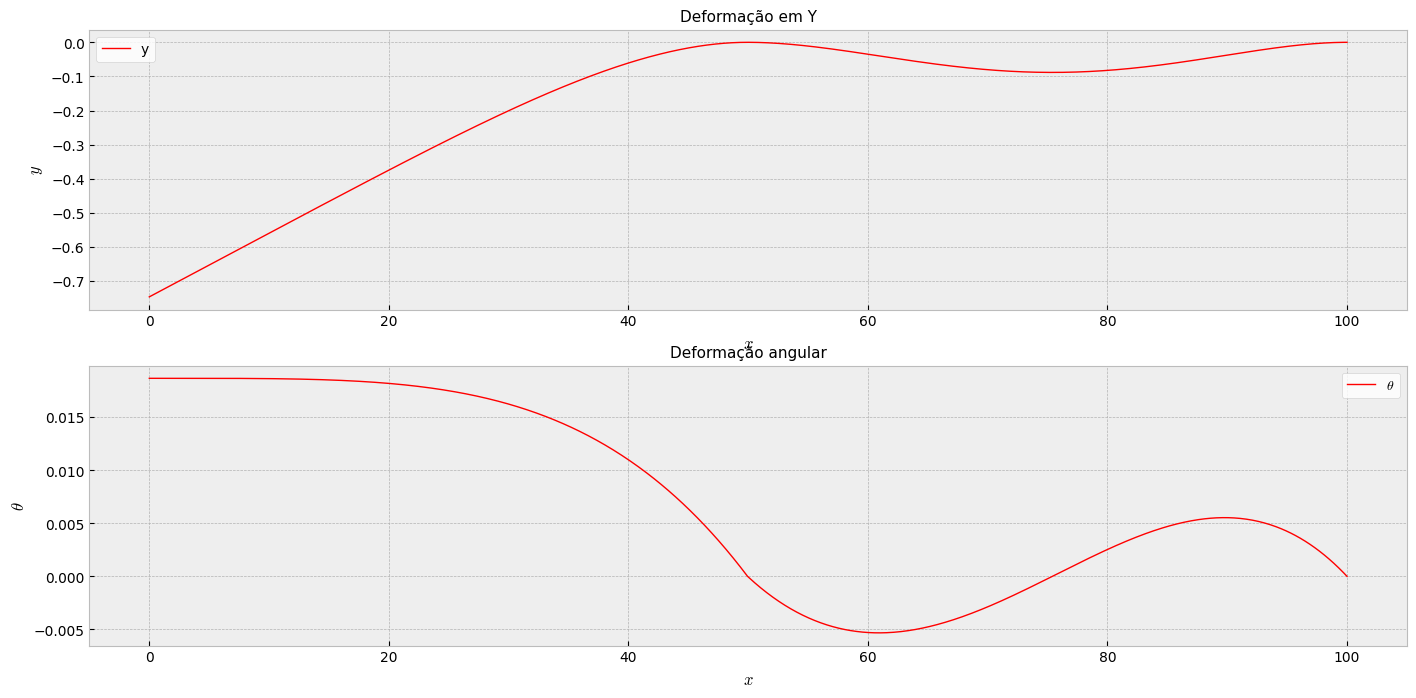

In [105]:
# parametros da simulacao

## malha
L = 100.0   # m
nx = 1000
ne = nx-1
nGL = 2*nx

## CCs
Yo = 0.0
Yf = 0.0
Thetao = 0.0 #np.pi/12.0
Thetaf = 0.0 #np.pi/12.0

# propriedades da linha
d = 0.180  # m
t = 0.022   # m
D = d + 2.0*t   # m
A = np.pi*(D**2.0 - d**2.0)/4.0   # m^2
I = np.pi*(D**4.0 - d**4.0)/64.0   # m^4
E = 206.0*10.0**12.0   # GPa
rho = 7800.0   # kg/m^3
rho_l = rho*A   # kg/m

# carga
def q(x):
    return -9.81*rho_l*x

# geracao de malha 1D
X = np.linspace(0.0,L,nx)
dbX = np.stack((X,X))
dbX = dbX.transpose()
dbX = dbX.flatten()

IEN_GL = np.zeros( (ne,4),dtype='int' )
for e in range(0,ne):
  IEN_GL[e] = [2*e,2*e+1,2*e+2,2*e+3]

# lista de indices de condicao de contorno
ccY = [999,nGL - 2]
ccTheta = [1000,nGL - 1]

# vetor com valores das condicoes de contorno
Ycc = np.zeros( (nGL),dtype='float' )

Ycc[ccY[0]] = Yo
Ycc[ccY[1]] = Yf

Thetacc = np.zeros( (nGL),dtype='float' )

Thetacc[ccTheta[0]] = Thetao
Thetacc[ccTheta[1]] = Thetaf

# inicializacao das matrizes globais
K = np.zeros( (nGL,nGL),dtype='float' )
#Q = np.zeros( (nGL,nGL),dtype='float' )
Q = np.zeros( (nGL),dtype='float' )

# obtendo matrizes elementares
## funcoes de interpolacao
'''
K11 = lambda x,l : E*I*Bh11(x,l)*Bh11(x,l)
K12 = lambda x,l : E*I*Bh11(x,l)*Bh12(x,l)
K13 = lambda x,l:  E*I*Bh11(x,l)*Bh13(x,l)
K14 = lambda x,l : E*I*Bh11(x,l)*Bh14(x,l)
K21 = lambda x,l : E*I*Bh12(x,l)*Bh11(x,l)
K22 = lambda x,l : E*I*Bh12(x,l)*Bh12(x,l)
K23 = lambda x,l : E*I*Bh12(x,l)*Bh13(x,l)
K24 = lambda x,l : E*I*Bh12(x,l)*Bh14(x,l)
K31 = lambda x,l : E*I*Bh13(x,l)*Bh11(x,l)
K32 = lambda x,l : E*I*Bh13(x,l)*Bh12(x,l)
K33 = lambda x,l : E*I*Bh13(x,l)*Bh13(x,l)
K34 = lambda x,l : E*I*Bh13(x,l)*Bh14(x,l)
K41 = lambda x,l : E*I*Bh14(x,l)*Bh11(x,l)
K42 = lambda x,l : E*I*Bh14(x,l)*Bh12(x,l)
K43 = lambda x,l : E*I*Bh14(x,l)*Bh13(x,l)
K44 = lambda x,l : E*I*Bh14(x,l)*Bh14(x,l)
'''
K11 = lambda x,X1,X2 : E*I*dBh11(x,X1,X2)*dBh11(x,X1,X2)
K12 = lambda x,X1,X2 : E*I*dBh11(x,X1,X2)*dBh12(x,X1,X2)
K13 = lambda x,X1,X2:  E*I*dBh11(x,X1,X2)*dBh13(x,X1,X2)
K14 = lambda x,X1,X2 : E*I*dBh11(x,X1,X2)*dBh14(x,X1,X2)
K21 = lambda x,X1,X2 : E*I*dBh12(x,X1,X2)*dBh11(x,X1,X2)
K22 = lambda x,X1,X2 : E*I*dBh12(x,X1,X2)*dBh12(x,X1,X2)
K23 = lambda x,X1,X2 : E*I*dBh12(x,X1,X2)*dBh13(x,X1,X2)
K24 = lambda x,X1,X2 : E*I*dBh12(x,X1,X2)*dBh14(x,X1,X2)
K31 = lambda x,X1,X2 : E*I*dBh13(x,X1,X2)*dBh11(x,X1,X2)
K32 = lambda x,X1,X2 : E*I*dBh13(x,X1,X2)*dBh12(x,X1,X2)
K33 = lambda x,X1,X2 : E*I*dBh13(x,X1,X2)*dBh13(x,X1,X2)
K34 = lambda x,X1,X2 : E*I*dBh13(x,X1,X2)*dBh14(x,X1,X2)
K41 = lambda x,X1,X2 : E*I*dBh14(x,X1,X2)*dBh11(x,X1,X2)
K42 = lambda x,X1,X2 : E*I*dBh14(x,X1,X2)*dBh12(x,X1,X2)
K43 = lambda x,X1,X2 : E*I*dBh14(x,X1,X2)*dBh13(x,X1,X2)
K44 = lambda x,X1,X2 : E*I*dBh14(x,X1,X2)*dBh14(x,X1,X2)
'''
Q11 = lambda x,X1,X2 : Nh11(x,X1,X2)*Nh11(x,X1,X2)
Q12 = lambda x,X1,X2 : Nh11(x,X1,X2)*Nh12(x,X1,X2)
Q13 = lambda x,X1,X2 : Nh11(x,X1,X2)*Nh13(x,X1,X2)
Q14 = lambda x,X1,X2 : Nh11(x,X1,X2)*Nh14(x,X1,X2)
Q21 = lambda x,X1,X2 : Nh12(x,X1,X2)*Nh11(x,X1,X2)
Q22 = lambda x,X1,X2 : Nh12(x,X1,X2)*Nh12(x,X1,X2)
Q23 = lambda x,X1,X2 : Nh12(x,X1,X2)*Nh13(x,X1,X2)
Q24 = lambda x,X1,X2 : Nh12(x,X1,X2)*Nh14(x,X1,X2)
Q31 = lambda x,X1,X2 : Nh13(x,X1,X2)*Nh11(x,X1,X2)
Q32 = lambda x,X1,X2 : Nh13(x,X1,X2)*Nh12(x,X1,X2)
Q33 = lambda x,X1,X2 : Nh13(x,X1,X2)*Nh13(x,X1,X2)
Q34 = lambda x,X1,X2 : Nh13(x,X1,X2)*Nh14(x,X1,X2)
Q41 = lambda x,X1,X2 : Nh14(x,X1,X2)*Nh11(x,X1,X2)
Q42 = lambda x,X1,X2 : Nh14(x,X1,X2)*Nh12(x,X1,X2)
Q43 = lambda x,X1,X2 : Nh14(x,X1,X2)*Nh13(x,X1,X2)
Q44 = lambda x,X1,X2 : Nh14(x,X1,X2)*Nh14(x,X1,X2)
'''
Q11 = lambda x,X1,X2 : q(x)*Nh11(x,X1,X2)
Q12 = lambda x,X1,X2 : q(x)*Nh12(x,X1,X2)
Q13 = lambda x,X1,X2 : q(x)*Nh13(x,X1,X2)
Q14 = lambda x,X1,X2 : q(x)*Nh14(x,X1,X2)

## Funcao de integracao a ser usada
def INTEGRACAO_1(f,e):
     v1,v2,v3,v4 = IEN_GL[e]
     return sp.integrate.quad(f,dbX[v1],dbX[v3],(dbX[v1],dbX[v3]))[0]

## Integrando
kelem = np.empty((4,4,ne))
#qelem = np.empty((4,4,ne))
qelem = np.empty((4,ne))

for e in range(0,ne):
    Ke = np.array([[INTEGRACAO_1(K11,e),INTEGRACAO_1(K12,e),INTEGRACAO_1(K13,e),INTEGRACAO_1(K14,e)],
                   [INTEGRACAO_1(K21,e),INTEGRACAO_1(K22,e),INTEGRACAO_1(K23,e),INTEGRACAO_1(K24,e)],
                   [INTEGRACAO_1(K31,e),INTEGRACAO_1(K32,e),INTEGRACAO_1(K33,e),INTEGRACAO_1(K34,e)],
                   [INTEGRACAO_1(K41,e),INTEGRACAO_1(K42,e),INTEGRACAO_1(K43,e),INTEGRACAO_1(K44,e)]])     

    #Qe = np.array([[INTEGRACAO_1(Q11,e),INTEGRACAO_1(Q12,e),INTEGRACAO_1(Q13,e),INTEGRACAO_1(Q14,e)],
                   #[INTEGRACAO_1(Q21,e),INTEGRACAO_1(Q22,e),INTEGRACAO_1(Q23,e),INTEGRACAO_1(Q24,e)],
                   #[INTEGRACAO_1(Q31,e),INTEGRACAO_1(Q32,e),INTEGRACAO_1(Q33,e),INTEGRACAO_1(Q34,e)],
                   #[INTEGRACAO_1(Q41,e),INTEGRACAO_1(Q42,e),INTEGRACAO_1(Q43,e),INTEGRACAO_1(Q44,e)]]) 

    Qe = np.array([INTEGRACAO_1(Q11,e),INTEGRACAO_1(Q12,e),INTEGRACAO_1(Q13,e),INTEGRACAO_1(Q14,e)])

    kelem[:,:,e] = Ke
    #qelem[:,:,e] = Qe
    qelem[:,e] = Qe

for e in range(0,ne):

 for ilocal in range(0,4):
  iglobal = IEN_GL[e,ilocal]
  for jlocal in range(0,4):
   jglobal = IEN_GL[e,jlocal]

   K[iglobal,jglobal] += kelem[ilocal,jlocal,e]
   #Q[iglobal,jglobal] += qelem[ilocal,jlocal,e]

for e in range(0,ne):
 for ilocal in range(0,4):
  Q[2*e + ilocal] += qelem[ilocal,e]

#print(np.array_str(K, precision=2, suppress_small=True))
#print(np.array_str(Q, precision=2, suppress_small=True))

# definicao do sistema linear
A = K
#b = Q@q(dbX)
b = Q

# imposicao das c.c.s de Dirichlet em A e b
for i in ccY:
  A[i,:] = 0.0   # zerar linha
  A[i,i] = 1.0   # incluir 1 na diagonal

  b[i] = Ycc[i]

for i in ccTheta:
  A[i,:] = 0.0   # zerar linha
  A[i,i] = 1.0   # incluir 1 na diagonal

  b[i] = Thetacc[i]

print(np.linalg.det(A))


# solucao
cscA = sp.sparse.csc_matrix(A)   # Matrix form that improves sparse.linalg.solve
SOL = sp.sparse.linalg.spsolve(cscA,b)
#SOL = np.linalg.solve(A,b)
SOL = SOL.reshape((int(nGL/2),2))

Y = SOL[:,0]
Theta = SOL[:,1]

# plotando
plt.style.use('bmh')

fig1, ((ax1), (ax2)) = plt.subplots(2, sharey=False, sharex=False, figsize = (17,8))

ax1.plot(X,Y, color='red', linewidth=1.0, label=r'y')
ax1.set_title('Deformação em Y',fontdict={'fontsize':11})
ax1.set_xlabel('$x$',fontdict={'fontsize':12})
ax1.set_ylabel('$y$',fontdict={'fontsize':12})
ax1.legend(loc='best',facecolor ='w')

ax2.plot(X,Theta, color='red', linewidth=1.0, label=r'$\theta$')
ax2.set_title('Deformação angular',fontdict={'fontsize':11})
ax2.set_xlabel('$x$',fontdict={'fontsize':12})
ax2.set_ylabel('$\\theta$',fontdict={'fontsize':12})
ax2.legend(loc='best',facecolor ='w')

plt.show()